In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('./housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [4]:
data.shape

(545, 13)

In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


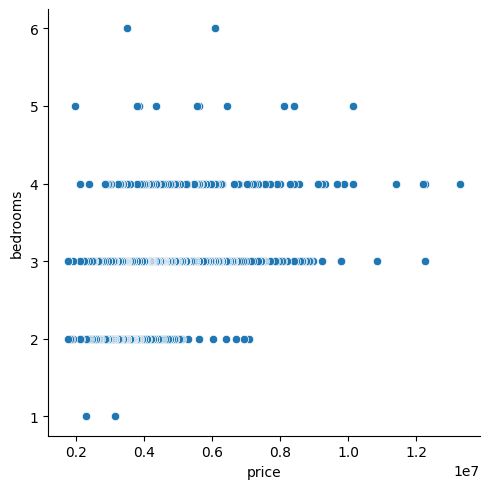

In [8]:
sns.relplot(x='price', y='bedrooms', data=data)

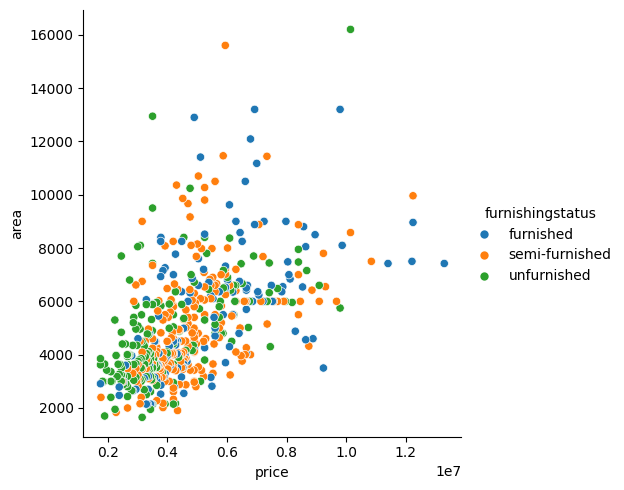

In [9]:
sns.relplot(x='price', y='area', data=data, hue='furnishingstatus')

In [10]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
train_data = data.drop(['price'], axis=1)
# train_data = data.drop(['price', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea',	'furnishingstatus'], axis=1)
test_data = data['price']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(train_data, test_data, test_size=0.3, random_state=2)

In [26]:
regr = LinearRegression()


In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming x_train and y_train are pandas DataFrames
# Convert categorical features in x_train to numeric using OneHotEncoder
x_train = pd.get_dummies(x_train)

# Convert categorical target variable y_train to numeric using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Now you can fit the model
regr.fit(x_train, y_train)

LinearRegression()

In [30]:
# Apply the same one-hot encoding transformation to the test set
x_test = pd.get_dummies(x_test)

# Ensure the test set has the same columns as the training set
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

# Make predictions
pred = regr.predict(x_test)
pred

array([ 48.40097617,  83.90509127,  14.54857237,  43.6588984 ,
       129.0120225 ,  67.57886854,  55.94126395,  35.96641781,
        56.83288341,  38.706501  ,  53.7425824 ,  35.78581497,
        48.0798675 ,  87.40241152,  80.55234768, 138.24054324,
       141.33490677,  82.05333293,  33.68058495,  74.08727444,
        98.83342347,  75.95138487,  81.03077563, 114.02070554,
         7.97219244,  23.16085313,  26.55445775,  63.69981293,
        85.59298974,  43.88297247,  83.40919561,  61.19110379,
        62.90548652,  87.88827715,  68.80130121, 146.41217566,
        20.19024657,  83.2519218 ,  88.54955602,  23.56793229,
       140.43903887,  42.73622068,  52.91325764,  66.66709729,
        31.27386156,  64.32442667,  31.0264117 ,  40.80157611,
        92.95746946,  89.00631284, 213.72434314, 110.62751362,
        25.69983873,  26.55445775,  69.3256646 , 126.64525625,
       122.16874898,  77.52240977,   8.55246125, 121.8215177 ,
        32.69104795,  37.27564502,  83.06177075, 140.70

In [31]:
regr.score(x_test, y_test)

-6.330657619409122